In [29]:
import numpy as np 
import matplotlib.pyplot as plt

#define constants 
q = 4.8e-10 # electron charge in statcoloumb 
a_prime = 10**19 #guess for sychrotron radiation in cm/s^2
c = 3e10 #cm/s 
A = q**2* a_prime**2/(4*np.pi*c**3)



phi_init = 0.0 #we want to plot in the xz plane 
gamma_init = 1/(np.sqrt(1-(v/c)**2))

print(A)

6.790610905254201e-14


In [44]:
#function for plotting radiation patterns of accelerating particles
def rad_pattern(gamma, title):
    #caluclate v according to gamma value 
    v = np.sqrt(c**2 * ( 1- gamma**(-2)))
    
    #want a polar plot so we need an array of theta values 
    thetas = np.linspace(0, 2*np.pi, 1000)
    
    P_parallels = []
    P_perps = []
    for theta in thetas:
        # write equation for perpendicuar component of power per solid angle 
        P_parallel = A * np.sin(theta)**2 /(gamma**2 * (1 - (v/c) * np.cos(theta))**2)
    
        P_parallels.append(P_parallel)
        
        p_1 = (gamma**2) * (1 - (v/c) * np.cos(theta))**4
        p_2 = (np.sin(theta)**2) * (np.cos(phi)**2)
        p_3 = (gamma**2) * (1 - (v/c) * np.cos(theta))**2
        
        P_perp = A * (1/p_1) * (1 - p_2/p_3)
    
        P_perps.append(P_perp)
    
    
    
    #plot
    plt.figure(figsize=(30, 30))  
    fig, axs = plt.subplots(1, 2, subplot_kw=dict(polar=True))
    
    
    #plot parallel 
    axs[0].plot(thetas, P_parallels, color='blue', linewidth=2)
    axs[0].set_title(r'$\frac{dP_{\parallel}}{d\Omega}$ for ' + title)
    axs[1].plot(thetas, P_perps, color='red', linewidth=2) 
    axs[1].set_title(r'$\frac{dP_{\perp}}{d\Omega}$ for ' + title)
   

    
    




    

<Figure size 3000x3000 with 0 Axes>

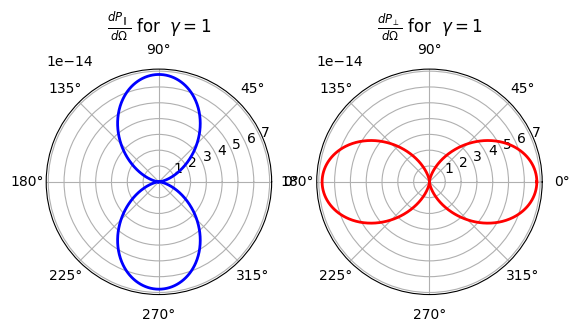

In [45]:
rad_pattern(1.0, r' $\gamma = 1$')

<Figure size 3000x3000 with 0 Axes>

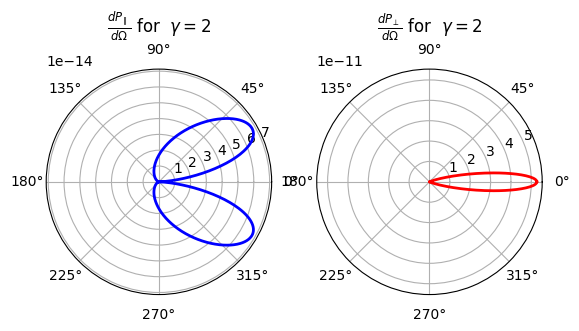

In [46]:
rad_pattern(2.0, r' $\gamma = 2$')

<Figure size 3000x3000 with 0 Axes>

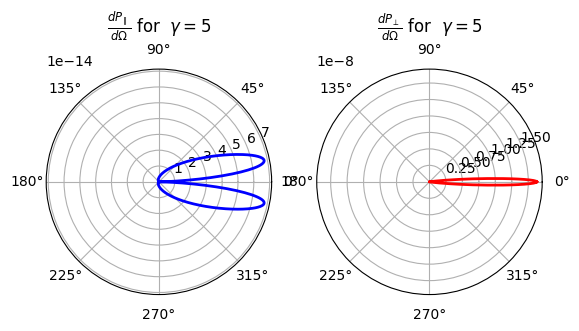

In [47]:
rad_pattern(5.0, r' $\gamma = 5$')

<Figure size 3000x3000 with 0 Axes>

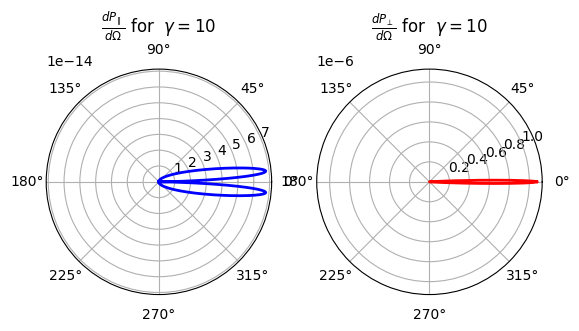

In [48]:
rad_pattern(10.0, r' $\gamma = 10$')